## Введение в машинное обучение

## НИУ ВШЭ

### Домашнее задание №2

### О задании

В этом домашнем задании вы реализуете алгоритм kNN и линейную регрессию, попрактикуетесь в решении задачи регрессии, а также решите теоретические задачи.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 18,
$$

где points — количество баллов за обязательную часть, которое вы набрали.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

# kNN своими руками (5)

В этом задании вам предстоит реализовать взвешенный алгоритм kNN для регрессии. Пусть необходимо вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

### Реализуйте две функции расстояния (1 балл)
- евклидова метрика **(0.5 балла)**
- метрика Манхэттена **(0.5 балла)**

Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m,)`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n,)`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [ ]:
import numpy as np

In [ ]:
def euclidian_metric(X, x):
    distances = # your code here
    return distances

def manhattan_metric(X, x):
    distances = # your code here
    return distances

In [ ]:
# проверка
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

- реализуйте класс kNN для равномерных весов (то есть $w_1 = \ldots = w_k$) **(3 балла)**
- добавьте возможность передать данному классу параметр `weights='distance'` для вызова взвешенной версии алгоритма kNN (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$ **(1 балл)**

In [ ]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """

        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        """

        # your code here
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        
        # your code here

        return y_pred

Сверьте для нескольких комбинаций различных гиперпараметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn`. **Не забудьте про гиперпараметр `weights`.**

In [ ]:
np.random.seed(13)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [ ]:
# your code here

# Линейная регрессия своими руками (5)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

*Чему будет равен градиент этой функции по $w$? Вспомните, что за вектор $\hat{y}$ и как он зависит от $X$ и $w$.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1.5 балла)

- функция потерь **(0.5 балла)**
- градиент **(1 балл)**

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy. Однако можно использовать оператор if.**

In [ ]:
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """

    pass

def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """

    pass

In [ ]:
# проверка

x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

y = 49.2

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

### Реализуйте линейную регрессию (3.5 балла)

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [ ]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """

        self.w = # your code here
        self.loss_history = # your code here
        
        # your code here
        
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Предскажите ответы с помощью обученных весов
        """
        
        y_pred = # your code here

        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """

        grad = np.zeros_like(self.w)

        # your code here
        
        return grad 
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как среднее loss'ов для каждого 
        примера
        """

        loss = 0
        
        # your code here
        
        return loss

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

In [ ]:
lrh = LinearRegressionHuber()
loss_history = lrh.fit(X_train, y_train)

In [ ]:
# your code here

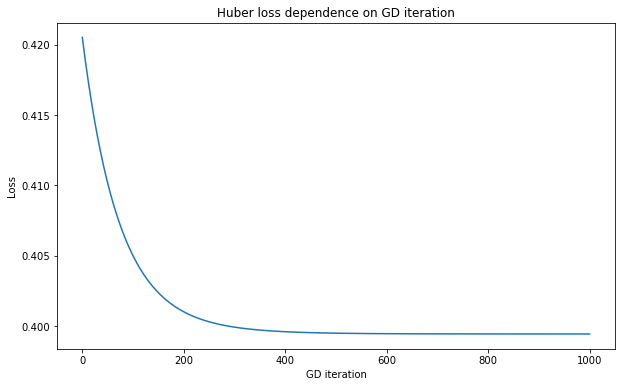

In [ ]:
# your code here

# Практика (8)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этой части вы поработаете с уже знакомыми вам данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [ ]:
data = pd.read_csv('train.csv', header=0)

In [ ]:
data.columns

In [ ]:
data.head()

## 0 (0.5)

Если в данных бессмысленные столбцы? Если да, избавьтесь от них и обоснуйте свое решение.

In [ ]:
# your code here

## 1 (0.5)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [ ]:
# your code here

## 2 (0.5)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [ ]:
# your code here

## 3 (0.5)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [ ]:
# your code here

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [ ]:
# your code here

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [ ]:
# your code here

## 6 (1)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

In [ ]:
# your code here

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль. Причем 75% объектов оставьте на обучение и 25% - на тестовую выборку.

Зафиксируйте при разбиении значение `random_state` = 13. Это потребуется для выполнения последующих заданий

In [ ]:
X_train, X_val, y_train, y_val = # your code here

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

## 7 (1.5)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Интерпретируйте полученные результаты.

In [ ]:
# your code here

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.212 на валидации по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# your code here

## 10* (1)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.210 на валидации по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here